# Assignment 1

Author:
- Seulki Kim

Created:
- February 3, 2019

Last modified:
- February 11, 2019

Affiliation: 
- Aerospace Systems Design Laboratory, School of Aerospace Engineering, Georgia Institute of Technology

## Library

In [9]:
# Import all libraries needed for this Jupyter notebook
from __future__ import print_function
import numpy as np
from matplotlib import cm
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import fmin, fsolve
import math as mt


## Problem 1

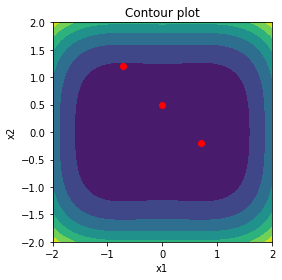

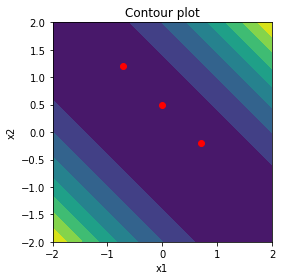

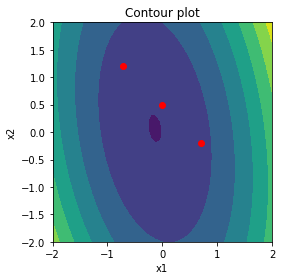

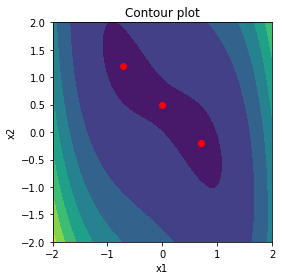

In [10]:
def contour_plot(fobj, x):
    
    # Generate the data for a contour plot
    n = 50
    x1 = np.linspace(-2, 2, n)
    x2 = np.linspace(-2, 2, n)
    X1, X2 = np.meshgrid(x1, x2)
    f = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            f[i, j] = fobj([X1[i, j], X2[i, j]])
            
    fig, ax = plt.subplots(1, 1)
       
    # Plot the directions on the contour plot
    for x0 in x:
        ax.plot([x0[0]], [x0[1]], 'ro')
    
    # ax.plot(x1, -x1, 'r-');
    # Draw contour plot
    ax.contourf(X1, X2, f)

    ax.set_aspect('equal', 'box')
    ax.set_title('Contour plot')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # plt.zlabel{'f(x1, x2)'}
    

    fig.tight_layout()
    plt.show()
    
def f1(x):
    return x[0]**4 + x[1]**4 + 1 - x[0]**2 + x[1]**2

def f2(x):
    return x[0]**2 + x[1]**2 + 2*x[0]*x[1]

def f3(x):
    return 4*x[0]**2 + x[1]**2 + x[0]*x[1] + x[0]

def f4(x):
    return x[0]**4 + x[1]**2 + 2*x[0]*x[1] - x[0] - x[1]

x = np.array([[0, 1/2], [1/mt.sqrt(2), (1-mt.sqrt(2))/2], [-1/mt.sqrt(2), (1+mt.sqrt(2))/2]])
# x = np.linspace(0, 10, 1000)

funcs = [f1, f2, f3, f4]

for fobj in funcs:
    contour_plot(fobj, x)
    #fmin(fobj,np.array([0,0]))
    


## Consider the function f(x)=x(1-x)^2(x-3) on the interval x in [-1,4]. From the point x=0, find a descent direction.

### Problem 2.1

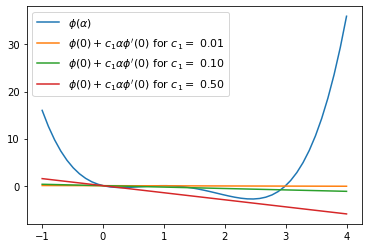

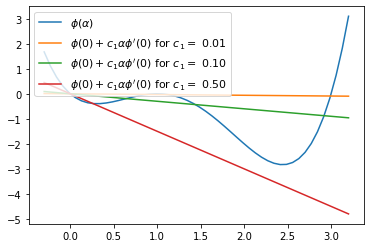

In [15]:
def fonedim(x):
    f = x[0]*(1 - x[0])**2*(x[0] - 3)
    return f

def fonedim_grad(x):
    g = np.array([4*x[0]**3 - 15*x[0]**2 + 14*x[0] -3])
    return g

def suff_func(x, c):
    return np.array([-3*c*x[0]])


n = 50
x = np.linspace(-1, 4, n)
x3 = np.linspace(-0.3, 3.2, n)
f = np.zeros(n)
f3 = np.zeros(n)

for i in range(n):
    f[i] = fonedim([x[i]])
    f3[i] = fonedim([x3[i]])
    

plt.figure()
plt.plot(x, f, label = r'$\phi(\alpha)$')
plt.legend(loc='upper left', fontsize = 11)
# plt.title('Sufficient Decrease Condition')

suff = np.zeros(n)
cvalue = np.array([0.01, 0.1, 0.5])
for c in cvalue:
    for j in range(n):
        suff[j] = suff_func([x[j]], c)
    
    plt.plot(x, suff, label = r'$\phi(0) + c_1 \alpha \phi^\prime(0)$ for $c_1 =$ {0:.2f}'.format(c))
    plt.legend(loc='upper left', fontsize = 11)
    
plt.figure()
plt.plot(x3, f3, label = r'$\phi(\alpha)$')
plt.legend(loc='upper left', fontsize = 11)
# plt.title('Sufficient Decrease Condition')


suff = np.zeros(n)
cvalue = np.array([0.01, 0.1, 0.5])
for c in cvalue:
    for j in range(n):
        suff[j] = suff_func([x3[j]], c)

    plt.plot(x3, suff, label = r'$\phi(0) + c_1 \alpha \phi^\prime(0)$ for $c_1 =$ {0:.2f}'.format(c)) 
    plt.legend(loc='upper left', fontsize = 11)


plt.show()    



In [16]:
def findInter(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)

result = findInter(fonedim, suff_func, 0.2)
print('result = ', result)

TypeError: suff_func() missing 1 required positional argument: 'c'

### Problem 2.2

NameError: name 'fig' is not defined

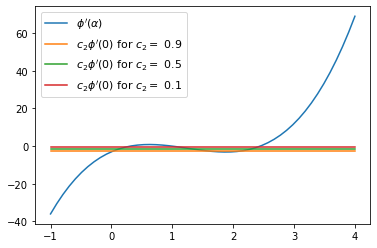

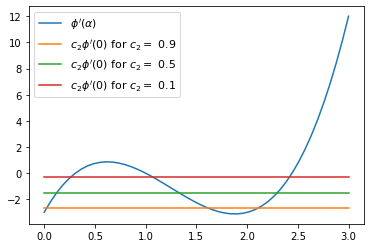

In [17]:
def curv_func(x, c):
    return np.array([-3*c])

x2 = np.linspace(0, 3, n)
g1 = np.zeros(n)
g2 = np.zeros(n)

for i in range(n):
    g1[i] = fonedim_grad([x[i]])
    g2[i] = fonedim_grad([x2[i]])

plt.figure()
plt.plot(x, g1, label = r'$\phi^\prime(\alpha)$')  
plt.legend(loc='upper left', fontsize = 11)

# plt.title('Second Wolfe Condition')

curv = np.zeros(n)
cvalue = np.array([0.9, 0.5, 0.1])
for c in cvalue:
    for j in range(n):
        curv[j] = curv_func([x[j]], c)
    
    plt.plot(x, curv, label = r'$c_2 \phi^\prime(0)$ for $c_2 =$ {0:.1f}'.format(c))
    plt.legend(loc='upper left', fontsize = 11)
    
plt.figure()
plt.plot(x2, g2, label = r'$\phi^\prime(\alpha)$')   
# plt.title('Second Wolfe Condition')

curv = np.zeros(n)
cvalue = np.array([0.9, 0.5, 0.1])
for c in cvalue:
    for j in range(n):
        curv[j] = curv_func([x[j]], c)
    
    plt.plot(x2, curv, label = r'$c_2 \phi^\prime(0)$ for $c_2 =$ {0:.1f}'.format(c))
    plt.legend(loc='upper left', fontsize = 11)    


fig.tight_layout()
plt.show()    





In [18]:
def curv_func(x, c = 0.1):
    return np.array([-3*c])

result = findInter(fonedim_grad, curv_func, 2)
print('result = ', result)

result =  [2.41794367]


### Problem 2.3

NameError: name 'fig' is not defined

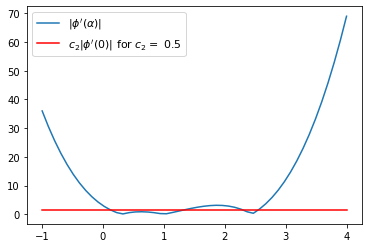

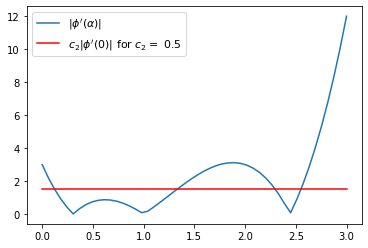

In [19]:
def strong_func(x, c):
    return np.array([abs(-3)*c])

def abs_fonedim_grad(x):
    h = np.array([abs(4*x[0]**3 - 15*x[0]**2 + 14*x[0] -3)])
    return h

h1 = np.zeros(n)
h2 = np.zeros(n)

for i in range(n):
    h1[i] = abs_fonedim_grad([x[i]])
    h2[i] = abs_fonedim_grad([x2[i]])

plt.figure()
plt.plot(x, h1, label = r'$|\phi^\prime(\alpha)|$')  
plt.legend(loc='upper left', fontsize = 11)  
# plt.title('Strong Wolfe Condition')

strong = np.zeros(n)
cvalue = np.array([0.5])
for c in cvalue:
    for j in range(n):
        strong[j] = strong_func([x[j]], c)
    
    plt.plot(x, strong, 'r-', label = r'$c_2 |\phi^\prime(0)|$ for $c_2 =$ {0:.1f}'.format(c))
    plt.legend(loc='upper left', fontsize = 11)
    
plt.figure()
plt.plot(x2, h2, label = r'$|\phi^\prime(\alpha)|$')  
plt.legend(loc='upper left', fontsize = 11)  
# plt.title('Strong Wolfe Condition')

strong = np.zeros(n)
cvalue = np.array([0.5])
for c in cvalue:
    for j in range(n):
        strong[j] = strong_func([x[j]], c)
    
    plt.plot(x2, strong, 'r-', label = r'$c_2 |\phi^\prime(0)|$ for $c_2 =$ {0:.1f}'.format(c))
    plt.legend(loc='upper left', fontsize = 11)


fig.tight_layout()
plt.show()    





In [20]:
result = findInter(abs_fonedim_grad, strong_func, 2.5)
print('result = ', result)

TypeError: strong_func() missing 1 required positional argument: 'c'

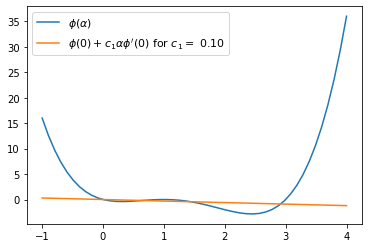

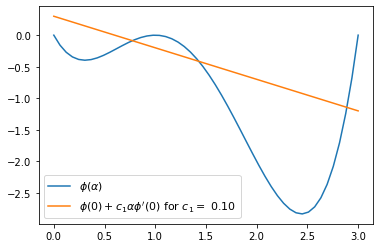

In [21]:
n = 50
t = np.zeros(n)
t3 = np.zeros(n)

for i in range(n):
    t[i] = fonedim([x[i]])
    t3[i] = fonedim([x2[i]])
    

plt.figure()
plt.plot(x, t, label = r'$\phi(\alpha)$')
plt.legend(loc='upper left', fontsize = 11)
# plt.title('Sufficient Decrease Condition')

suff = np.zeros(n)
cvalue = np.array([0.1])
for c in cvalue:
    for j in range(n):
        suff[j] = suff_func([x[j]], c)
    
    plt.plot(x, suff, label = r'$\phi(0) + c_1 \alpha \phi^\prime(0)$ for $c_1 =$ {0:.2f}'.format(c))
    plt.legend(loc='upper left', fontsize = 11)
    
plt.figure()
plt.plot(x2, t3, label = r'$\phi(\alpha)$')
plt.legend(loc='upper left', fontsize = 11)
# plt.title('Sufficient Decrease Condition')

suff = np.zeros(n)
cvalue = np.array([0.1])
for c in cvalue:
    for j in range(n):
        suff[j] = suff_func([x[j]], c)
    
    plt.plot(x2, suff, label = r'$\phi(0) + c_1 \alpha \phi^\prime(0)$ for $c_1 =$ {0:.2f}'.format(c))
    plt.legend(loc='lower left', fontsize = 11)
    


## Problem 3

### Line Search using Suffcient Decrease Condition

Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             2.81875000e+01
phi0 + c1*alpha*dphi0 =                 -1.15500000e-01
Iteration number = 0.0
Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             1.25997693e+02
phi0 + c1*alpha*dphi0 =                  2.88557225e+01
Iteration number = 0.0
Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             7.58933812e-01
phi0 + c1*alpha*dphi0 =                  2.47763932e-01
Iteration number = 0.0
Sufficient decrease failed with alpha =  5.00000000e-01
phi(alpha) =                             5.38043949e-01
phi0 + c1*alpha*dphi0 =                  2.48881966e-01
Iteration number = 1.0
Sufficient decrease failed with alpha =  2.50000000e-01
phi(alpha) =                             6.27491467e-01
phi0 + c1*alpha*dphi0 =                  2.49440983e-01
Iteration number = 2.0
Sufficient decrease failed with alpha =  1.25

0.0625

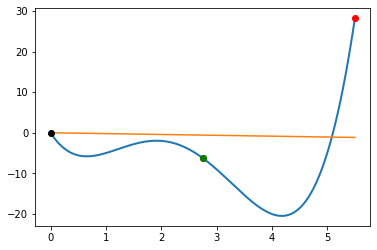

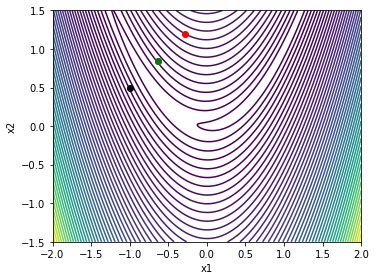

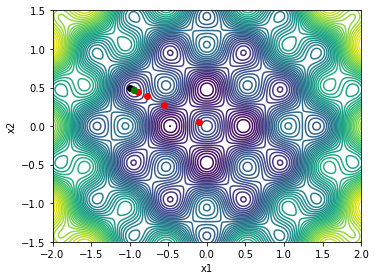

In [22]:
from __future__ import print_function
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def fonedim(x, linesearch=False, symb='ko'):
    f = -x[0] + x[0]*(x[0] - 5)*(2 - x[0])**2
    if linesearch:
        plt.plot(x[0], f, symb)
    return f

def fonedim_grad(x):
    return np.array([-21 + 48*x[0] - 27*x[0]**2 + 4*x[0]**3])
   
def rosen(x, linesearch=False, symb='ko'):
    '''If the linesearch flag is true, plot the point'''
    if linesearch:
        plt.plot([x[0]], [x[1]], symb)
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def rosen_grad(x):
    return np.array([-2*(1 - x[0]) - 200*(x[1] - x[0]**2)*x[0], 
                      200*(x[1] - x[0]**2) ])

def griewank(x, linesearch=False, symb='ko'):
    if linesearch:
        plt.plot([x[0]], [x[1]], symb)
    return x[0]**2 + x[1]**2 + np.cos(2*np.pi*x[0])*np.cos(2*np.pi*x[1])

def griewank_grad(x):
    return np.array([2*x[0] - 2*np.pi*np.sin(2*np.pi*x[0])*np.cos(2*np.pi*x[1]),
                     2*x[1] - 2*np.pi*np.cos(2*np.pi*x[0])*np.sin(2*np.pi*x[1])])

def onedim_plot(func, n=250, xhigh=5.0):
    x = np.linspace(0, xhigh, n)
    f = np.zeros(n)
    for i in range(n):
        f[i] = func([x[i]])
    plt.figure()
    plt.plot(x, f, linewidth=2)
    return

def contour_plot(func, n=250, xlow=-2, xhigh=2, ylow=-1.5, yhigh=1.5):
    '''Create a contour plot of the function'''
    x = np.linspace(xlow, xhigh, n)
    y = np.linspace(ylow, yhigh, n)
    X, Y = np.meshgrid(x, y)
    f = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            f[i, j] = func([X[i, j], Y[i, j]])

    fig, ax = plt.subplots(1, 1)
    if func == rosen:
        ax.contour(X, Y, f, levels=np.max(f)*np.linspace(0, 1.0, 50)**2)
    else:
        ax.contour(X, Y, f, levels=np.linspace(np.min(f), np.max(f), 50))
    plt.xlabel('x1')
    plt.ylabel('x2')
    ax.set_aspect('equal', 'box')
    fig.tight_layout()    
    
    return
    
def backtrack(func, grad_func, x, p, 
              tau=0.5, alpha=1.0, c1=1e-3, max_iter=100):
    '''
    Given the function pointer and the gradient function pointer,
    find a step length alpha that satisfies the sufficient decrease
    conditions.
    '''
    
    # Evaluate the function and gradient at the initial point x
    phi0 = func(x, linesearch=True)
    grad0 = grad_func(x)
    
    # Compute the derivative of the merit function at alpha = 0.0
    dphi0 = np.dot(grad0, p)
    
    # Check for a descent direction
    if dphi0 >= 0.0:
        return ValueError('Must provide a descent direction')
    
    for i in range(max_iter):
        # Evaluate the function at the new point
        xp = x + alpha*p
        phi = func(xp, linesearch=True, symb='ro')
        
        # Check the sufficient decrease condition
        if phi < phi0 + c1*alpha*dphi0:
            # Evaluate the function again to illustrate the final point
            func(xp, linesearch=True, symb='go')
            return alpha
        else:
            print('Sufficient decrease failed with alpha = %15.8e'%(alpha))
            print('phi(alpha) =                            %15.8e'%(phi))
            print('phi0 + c1*alpha*dphi0 =                 %15.8e'%(phi0 + c1*alpha*dphi0))
            print('Iteration number = %.1f'%(i))
        
        # Set the alpha values and append one to the list
        alpha = tau*alpha
    
    # The line search has failed at this point
    return 0.0

# Plot the one dimensional problem
x = np.array([0])
p = np.array([5.5])
onedim_plot(fonedim, xhigh=5.5)

# Plot the sufficient decrease line on the plot
phi0 = fonedim(x)
dphi0 = np.dot(fonedim_grad(x), p)
xhigh = 5.5
alph = p[0]
c1 = 0.01
plt.plot([0.0, xhigh], [phi0, phi0 + c1*(xhigh/alph)*dphi0])

# Perform a backtracking line search
backtrack(fonedim, fonedim_grad, x, p)

# Create a contour plot
contour_plot(rosen)

# Choose an initial point and the gradient direction
x = np.array([-1, 0.5])
p = -rosen_grad(x)
p = p/np.sqrt(np.dot(p, p))

# Perform a backtracking line search
backtrack(rosen, rosen_grad, x, p)

# Create a contour plot
contour_plot(griewank)

p = -griewank_grad(x)
p = p/np.sqrt(np.dot(p, p))

# Perform a backtracking line search
backtrack(griewank, griewank_grad, x, p)

### Line Search using Strong Wolfe Condition 

Sufficient decrease conditions violated: interval found
Zoom: Curvature condition violated
Zoom: Wolfe conditions satisfied
Slope condition violated; interval found
Zoom: Curvature condition violated
Zoom: Wolfe conditions satisfied


1.75

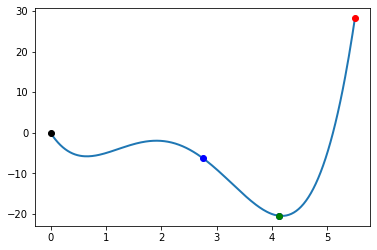

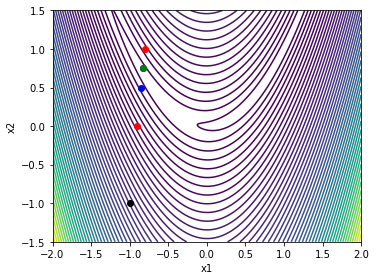

In [23]:
from __future__ import print_function
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def strong_wolfe(func, grad_func, x, pk, c1=1e-3, c2=0.9,
                 alpha=1.0, alpha_max=100.0, max_iters=100, 
                 verbose=False):
    '''
    Strong Wolfe condition line search method 

    Input:
    func:      the function pointer
    grad_func: the gradien function pointer
    x:         the design variables
    p:         the search direction
    alpha:     the initial estimate for the step length
    alpha_max: the maximum value of alpha 

    returns:
    alpha:     the step length satisfying the strong Wolfe conditions
    '''
    
    # Compute the function and the gradient at alpha = 0
    fk = func(x, linesearch=True)
    gk = grad_func(x)

    # Compute the dot product of the gradient with the search
    # direction to evaluate the derivative of the merit function
    proj_gk = np.dot(gk, pk)

    # Store the old value of the objective
    fj_old = fk
    proj_gj_old = proj_gk
    alpha_old = 0.0

    for j in range(max_iters):
        # Evaluate the merit function
        fj = func(x + alpha*pk, linesearch=True, symb='ro')

        # Evaluate the gradient at the new point
        gj = grad_func(x + alpha*pk)
        proj_gj = np.dot(gj, pk)

        # Check if either the sufficient decrease condition is
        # violated or the objective increased
        if (fj > fk + c1*alpha*proj_gk or
            (j > 0 and fj > fj_old)):
            if verbose:
                print('Sufficient decrease conditions violated: interval found')
            # Zoom and return
            return zoom(func, grad_func, fj_old, proj_gj_old, alpha_old, 
                        fj, proj_gj, alpha,
                        x, fk, gk, pk, c1=c1, c2=c2, verbose=verbose)

        # Check if the strong Wolfe conditions are satisfied
        if np.fabs(proj_gj) <= c2*np.fabs(proj_gk):
            if verbose:
                print('Strong Wolfe alpha found directly')
            func(x + alpha*pk, linesearch=True, symb='go')
            return alpha

        # If the line search is vioalted
        if proj_gj >= 0.0:
            if verbose:
                print('Slope condition violated; interval found')
            return zoom(func, grad_func, fj, proj_gj, alpha, 
                        fj_old, proj_gj_old, alpha_old,
                        x, fk, gk, pk, c1=c1, c2=c2, verbose=verbose)

        # Record the old values of alpha and fj
        fj_old = fj
        proj_gj_old = proj_gj
        alpha_old = alpha

        # Pick a new value for alpha
        alpha = min(2.0*alpha, alpha_max)

        if alpha >= alpha_max:
            if verbose:
                print('Line search failed here')
            return None

    if verbose:
        print('Line search unsuccessful')
    return alpha

def zoom(func, grad_func, f_low, proj_low, alpha_low, 
         f_high, proj_high, alpha_high,
         x, fk, gk, pk, c1=1e-3, c2=0.9, max_iters=100, verbose=False):
    '''
    Zoom function: Locate a value between alpha_low and alpha_high
    that satisfies the strong Wolfe conditions. Remember:
    alpha_low/alpha_high are step lengths yielding the
    lowest/higher values of the merit function. 

    input:
    f_low:      the value of f(x) at alpha_low
    proj_low:   the value of the derivative of phi at alpha_low
    alpha_low:  the value of the step at alpha_low
    f_high:     the value of f(x) at alpha_high
    proj_high:  the value of the derivative of phi at alpha_high
    alpha_high: the value of the step at alpha_high
    x:          the value of the design variables at alpha = 0
    fk:         the value of the function at alpha = 0
    gk:         the gradient of the function at alpha = 0
    pk:         the line search direction

    returns:
    alpha:   a step length satisfying the strong Wolfe conditions
    '''

    proj_gk = np.dot(pk, gk)

    for j in range(max_iters):
        # Pick an alpha value using cubic interpolation
        # alpha_j = cubic_interp(alpha_low, f_low, proj_low,
        #                        alpha_high, f_high, proj_high)

        # Pick an alpha value by bisecting the interval
        alpha_j = 0.5*(alpha_high + alpha_low)

        # Evaluate the merit function
        fj = func(x + alpha_j*pk, linesearch=True, symb='bo')

        # Check if the sufficient decrease condition is violated
        if fj > fk + c1*alpha_j or fj >= f_low:
            if verbose:
                print('Zoom: Sufficient decrease conditions violated')
            alpha_high = alpha_j
            f_high = fj

            # We need the derivative here for proj_high
            gj = grad_func(x + alpha_j*pk)
            proj_high = np.dot(gj, pk)
        else:
            # Evaluate the gradient of the function and the
            # derivative of the merit function
            gj = grad_func(x + alpha_j*pk)
            proj_gj = np.dot(gj, pk)

            # Return alpha, the strong Wolfe conditions are
            # satisfied
            if np.fabs(proj_gj) <= c2*np.fabs(proj_gk):
                if verbose:
                    print('Zoom: Wolfe conditions satisfied')
                func(x + alpha_j*pk, linesearch=True, symb='go')
                return alpha_j
            elif verbose:
                 print('Zoom: Curvature condition violated')

            # Make sure that we have the intervals right
            if proj_gj*(alpha_high - alpha_low) >= 0.0:
                # Swap alpha high/alpha low
                alpha_high = alpha_low
                proj_high = proj_low
                f_high = f_low

            # Swap alpha low/alpha j
            alpha_low = alpha_j
            proj_low = proj_gj
            f_low = fj

    return alpha_j

def cubic_interp(self, x0, m0, dm0, x1, m1, dm1, verbose=False):
    '''
    Return an x in the interval (x0, x1) that minimizes a cubic
    interpolant between two points with both function and
    derivative values.

    This method does not assume that x0 > x1. If the solution is
    not in the interval, the function returns the mid-point.
    '''

    # Compute d1
    d1 = dm0 + dm1 - 3*(m0 - m1)/(x0 - x1)

    # Check that the square root will be real in the
    # expression for d2
    if (d1**2 - dm0*dm1) < 0.0:
        if verbose:
            print('Cubic interpolation fail')
        return 0.5*(x0 + x1)

    # Compute d2
    d2 = np.sign(x1 - x0)*np.sqrt(d1**2 - dm0*dm1)

    # Evaluate the new interpolation point
    x = x1 - (x1 - x0)*(dm1 + d2 - d1)/(dm1 - dm0 + 2*d2)

    # If the new point is outside the interval, return
    # the mid point
    if x1 > x0 and (x > x1 or x < x0):
        return 0.5*(x0 + x1)
    elif x0 > x1 and (x > x0 or x < x1):
        return 0.5*(x0 + x1)

    return x

# Plot the one dimensional problem
x = np.array([0])
p = np.array([5.5])
onedim_plot(fonedim, xhigh=5.5)

# Perform a backtracking line search
strong_wolfe(fonedim, fonedim_grad, x, p, c2=0.1, verbose=True)

# Choose an initial point and the gradient direction
x = np.array([-1, -1])
# p = -rosen_grad(x)
# p = *p/np.sqrt(np.dot(p, p))
p = np.array([0.1, 1])

# Create a contour plot
contour_plot(rosen)

# Perform a backtracking line search
strong_wolfe(rosen, rosen_grad, x, p, c2=0.1, verbose=True)

### Steepest Descent Method

Steepest descent failed

[1.00219132 1.00437127]


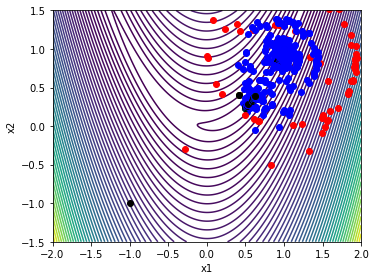

In [24]:
def steepest_descent(x0, func, grad_func, 
                     c1=1e-3, c2=0.9, eps=1e-6, 
                     max_iters=2500, line_search_type='strong Wolfe'):
    '''
    Solve an unconstrained optimization problem using the steepest descent method.
    
    input:
    x0:         the starting point
    func:       a function pointer to f(x)
    grad_func:  a function pointer to the gradient of f(x) 
    c1:         sufficient decrease parameter
    c2:         curvature condition parameter
    eps:        stopping tolerance such that ||grad f(x)|| < eps
    max_iters:  maximum number of iterations before we give up
    '''
    # Make sure we are using a np array
    x = np.array(x0)
    
    for i in range(max_iters):
        grad = grad_func(x)
        
        # Check the norm of the gradient
        if np.sqrt(np.dot(grad, grad)) < eps:
            print('Steepest descent found first-order point\n')
            return x 
        
        pk = -grad/np.sqrt(np.dot(grad, grad))
        
        if line_search_type == 'strong Wolfe':
            alpha = strong_wolfe(func, grad_func, x, pk, c1=c1, c2=c2)
        else:
            alpha = backtrack(func, grad_func, x, pk, c1=c1)
        x += alpha*pk
    
    print('Steepest descent failed\n')
    return x

# Create a contour plot
contour_plot(rosen)

# Perform a backtracking line search
x0 = [-1.0, -1.0]
xstar = steepest_descent(x0, rosen, rosen_grad, c2=0.1, max_iters=100)
print(xstar)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()


### Conjugate Gradient Method

Conjugate gradient method failed to converge

[1.02506008 1.05089174]


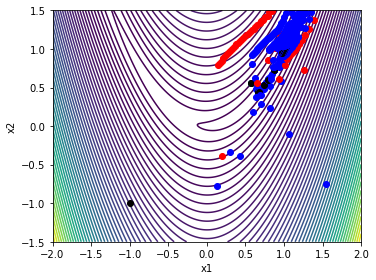

In [25]:
def conjugate_gradient(x0, func, grad_func, 
                       c1=1e-3, c2=0.9, eps=1e-6, 
                       max_iters=2500, line_search_type='strong Wolfe'):
    '''
    Solve an unconstrained optimization problem using the Fletcher-Reeves 
    conjugate gradient method
    
    input:
    x0:         the starting point
    func:       a function pointer to f(x)
    grad_func:  a function pointer to the gradient of f(x) 
    c1:         sufficient decrease parameter
    c2:         curvature condition parameter
    eps:        stopping tolerance such that ||grad f(x)|| < eps
    max_iters:  maximum number of iterations before we give up
    '''
    # Make sure we are using a np array
    x = np.array(x0)
    grad_prev = np.zeros(x.shape)
    p_prev = np.zeros(x.shape)
    
    for i in range(max_iters):
        grad = grad_func(x)
        
        # Check the norm of the gradient
        if np.sqrt(np.dot(grad, grad)) < eps:
            print('Conjugate gradient method found a first-order point\n')
            return x
            
        if i > 0:
            beta = np.dot(grad, grad)/np.dot(grad_prev, grad_prev)
            pk = -grad + beta*p_prev
        else:
            pk = -grad
            
        # Check if we have a descent direction. If not revert to the
        # steepest descent method.
        if np.dot(pk, grad) >= 0.0:
            pk = -grad

        if line_search_type == 'strong Wolfe':
            alpha = strong_wolfe(func, grad_func, x, pk, c1=c1, c2=c2)
        else:
            alpha = backtrack(func, grad_func, x, pk, c1=c1)
        x += alpha*pk
        
        # Save the previous information
        grad_prev[:] = grad[:]
        p_prev[:] = pk[:]
    
    print('Conjugate gradient method failed to converge\n')
    return x

# Create a contour plot
contour_plot(rosen)

# Perform a backtracking line search
x0 = [-1.0, -1.0]
xstar = conjugate_gradient(x0, rosen, rosen_grad, c2=0.1, max_iters=100)
print(xstar)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

### Problem 3.1.1 with steepest descent method

Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             1.08517879e+00
phi0 + c1*alpha*dphi0 =                  1.05370015e+00
Iteration number = 0.0
Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             5.69234790e+00
phi0 + c1*alpha*dphi0 =                  7.55626346e-01
Iteration number = 0.0
Sufficient decrease failed with alpha =  5.00000000e-01
phi(alpha) =                             1.42885856e+00
phi0 + c1*alpha*dphi0 =                  7.55725653e-01
Iteration number = 1.0
Sufficient decrease failed with alpha =  2.50000000e-01
phi(alpha) =                             8.47002623e-01
phi0 + c1*alpha*dphi0 =                  7.55775307e-01
Iteration number = 2.0
Sufficient decrease failed with alpha =  1.25000000e-01
phi(alpha) =                             7.60403981e-01
phi0 + c1*alpha*dphi0 =                  7.55800134e-01
Iteration number = 3.0
Sufficient decrease failed with alpha =  1.00

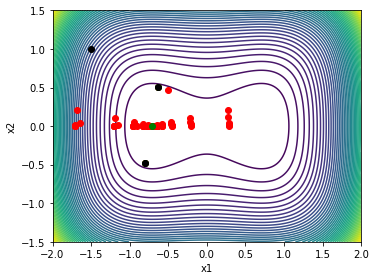

Steepest descent found first-order point

[-7.07106668e-01  3.64133402e-07]


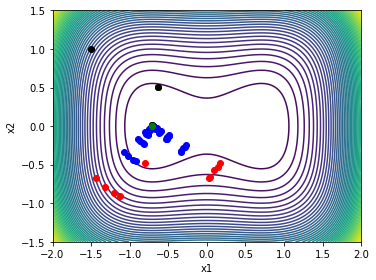

In [26]:
def ftwodim1(x, linesearch=False, symb='ko'):
    '''If the linesearch flag is true, plot the point'''
    if linesearch:
        plt.plot([x[0]], [x[1]], symb)
    return x[0]**4 + x[1]**4 + 1 - x[0]**2 + x[1]**2

def ftwodim1_grad(x):
    return np.array([4*x[0]**3 - 2*x[0], 
                     4*x[1]**3 + 2*x[1] ])

## Steepest descent method using sufficient decrease
# Create a contour plot
contour_plot(ftwodim1)

# Perform a backtracking line search
x0 = [-1.5, 1.0]
xstar_suff = steepest_descent(x0, ftwodim1, ftwodim1_grad, c2=0.1, max_iters=100, line_search_type='suffcient decrease')
print(xstar_suff)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

## Steepest descent method using strong Wolfe
# Create a contour plot
contour_plot(ftwodim1)

xstar_strong = steepest_descent(x0, ftwodim1, ftwodim1_grad, c2=0.1, max_iters=100, line_search_type='strong Wolfe')
print(xstar_strong)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

### Problem 3.1.2 with conjugate gradient method

Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             7.13100000e+03
phi0 + c1*alpha*dphi0 =                  5.66625000e+00
Iteration number = 0.0
Sufficient decrease failed with alpha =  5.00000000e-01
phi(alpha) =                             2.04691406e+02
phi0 + c1*alpha*dphi0 =                  5.73937500e+00
Iteration number = 1.0
Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             2.41538910e+00
phi0 + c1*alpha*dphi0 =                  1.63892310e+00
Iteration number = 0.0
Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             9.29417453e+00
phi0 + c1*alpha*dphi0 =                  9.30765729e-01
Iteration number = 0.0
Sufficient decrease failed with alpha =  5.00000000e-01
phi(alpha) =                             1.19474826e+00
phi0 + c1*alpha*dphi0 =                  9.31114367e-01
Iteration number = 1.0
Sufficient decrease failed with alpha =  1.00

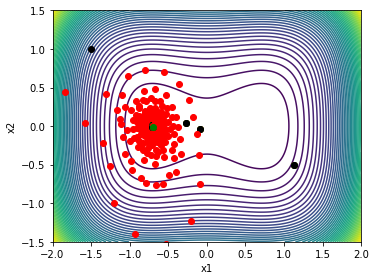

Conjugate gradient method found a first-order point

[-7.07107013e-01 -6.65817995e-08]


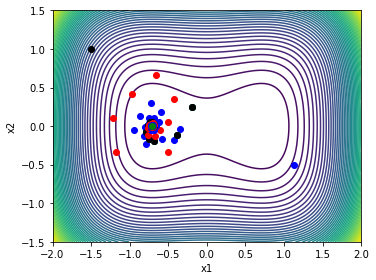

In [27]:
## Conjugate gradient method using sufficient decrease
# Create a contour plot
contour_plot(ftwodim1)

# Perform a backtracking line search
x0 = [-1.5, 1.0]
xstar_suff = conjugate_gradient(x0, ftwodim1, ftwodim1_grad, c2=0.1, max_iters=100, line_search_type='suffcient decrease')
print(xstar_suff)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

## Conjugate gradient method using strong Wolfe
# Create a contour plot
contour_plot(ftwodim1)

xstar_strong = conjugate_gradient(x0, ftwodim1, ftwodim1_grad, c2=0.1, max_iters=100, line_search_type='strong Wolfe')
print(xstar_strong)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

### Problem 3.2.1 with steepest descent method

Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             2.59804018e+01
phi0 + c1*alpha*dphi0 =                  2.58999800e+01
Iteration number = 0.0
Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             1.04039488e+02
phi0 + c1*alpha*dphi0 =                  9.78123955e-01
Iteration number = 0.0
Sufficient decrease failed with alpha =  5.00000000e-01
phi(alpha) =                             7.00002372e+00
phi0 + c1*alpha*dphi0 =                  9.79113957e-01
Iteration number = 1.0
Sufficient decrease failed with alpha =  2.50000000e-01
phi(alpha) =                             1.00321774e+00
phi0 + c1*alpha*dphi0 =                  9.79608958e-01
Iteration number = 2.0
Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             7.52756470e+01
phi0 + c1*alpha*dphi0 =                  7.77376671e-01
Iteration number = 0.0
Sufficient decrease failed with alpha =  5.00

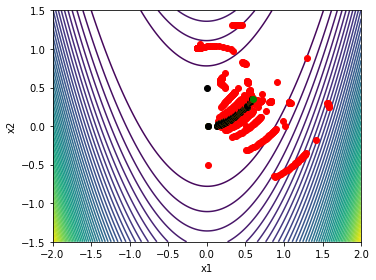

Steepest descent failed

[0.81180214 0.65855272]


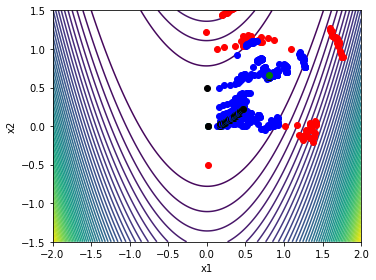

In [28]:
def ftwodim2(x, linesearch=False, symb='ko'):
    '''If the linesearch flag is true, plot the point'''
    if linesearch:
        plt.plot([x[0]], [x[1]], symb)
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def ftwodim2_grad(x):
    return np.array([400*x[0]**3 - 400*x[0]*x[1] + 2*x[0] - 2, 
                     200*x[1] - 200*x[0]**2 ])

## Steepest descent method using sufficient decrease
# Create a contour plot
contour_plot(ftwodim2)

# Perform a backtracking line search
x0 = [0, 0.5]
xstar_suff = steepest_descent(x0, ftwodim2, ftwodim2_grad, c2=0.1, max_iters=100, line_search_type='suffcient decrease')
print(xstar_suff)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

## Steepest descent method using strong Wolfe
# Create a contour plot
contour_plot(ftwodim2)

xstar_strong = steepest_descent(x0, ftwodim2, ftwodim2_grad, c2=0.1, max_iters=100, line_search_type='strong Wolfe')
print(xstar_strong)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

### Problem 3.2.2 with conjugate gradient method

Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             1.07122600e+06
phi0 + c1*alpha*dphi0 =                  1.59960000e+01
Iteration number = 0.0
Sufficient decrease failed with alpha =  5.00000000e-01
phi(alpha) =                             2.55025000e+05
phi0 + c1*alpha*dphi0 =                  2.09980000e+01
Iteration number = 1.0
Sufficient decrease failed with alpha =  2.50000000e-01
phi(alpha) =                             6.12565000e+04
phi0 + c1*alpha*dphi0 =                  2.34990000e+01
Iteration number = 2.0
Sufficient decrease failed with alpha =  1.25000000e-01
phi(alpha) =                             1.45509531e+04
phi0 + c1*alpha*dphi0 =                  2.47495000e+01
Iteration number = 3.0
Sufficient decrease failed with alpha =  6.25000000e-02
phi(alpha) =                             3.32500879e+03
phi0 + c1*alpha*dphi0 =                  2.53747500e+01
Iteration number = 4.0
Sufficient decrease failed with alpha =  3.12

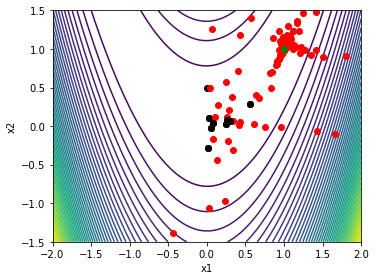

Conjugate gradient method found a first-order point

[0.99999973 0.99999947]


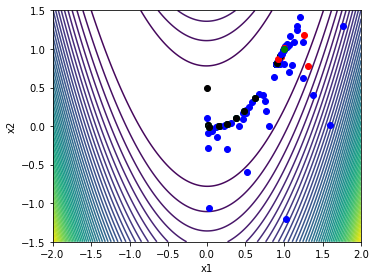

In [29]:
## Conjugate gradient method using sufficient decrease
# Create a contour plot
contour_plot(ftwodim2)

# Perform a backtracking line search
x0 = [0, 0.5]
xstar_suff = conjugate_gradient(x0, ftwodim2, ftwodim2_grad, c2=0.1, max_iters=100, line_search_type='suffcient decrease')
print(xstar_suff)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()

## Conjugate gradient method using strong Wolfe
# Create a contour plot
contour_plot(ftwodim2)

xstar_strong = conjugate_gradient(x0, ftwodim2, ftwodim2_grad, c2=0.1, max_iters=100, line_search_type='strong Wolfe')
print(xstar_strong)

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.show()